# Arboles de Decisiones
____________


In [44]:
import warnings

# Desactivar advertencias de FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

### Carga de datos

#### Importacion de las librerias basicas

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Carga el data set en una variable
prestamos = pd.read_excel('../datos/prestamos_bancarios_alemanes_1994.xls')

#### Exproracion de los datos

In [47]:
prestamos.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,...,4.0,2.0,21.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0
1,1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,...,2.0,1.0,36.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0
2,1,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,...,4.0,1.0,23.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0
3,1,1.0,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,...,2.0,1.0,39.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0
4,1,1.0,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,...,4.0,2.0,38.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0


In [48]:
# Obtiene informacion de las filas y las columnas
prestamos.info()
total_registro = prestamos.shape[0]
print(f'Total de registro en el dataset: {total_registro}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1001 non-null   int64  
 1   Account Balance                    1000 non-null   float64
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   float64
 4   Purpose                            1000 non-null   float64
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   float64
 7   Length of current employment       1000 non-null   float64
 8   Instalment per cent                1000 non-null   float64
 9   Sex & Marital Status               1000 non-null   float64
 10  Guarantors                         1000 non-null   float64
 11  Duration in Current address        1000 non-null   float

In [49]:
prestamos.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1001.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.398601,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,22.107509,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,700.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [50]:
prestamos.isnull().sum()

Creditability                        0
Account Balance                      1
Duration of Credit (month)           1
Payment Status of Previous Credit    1
Purpose                              1
Credit Amount                        1
Value Savings/Stocks                 1
Length of current employment         1
Instalment per cent                  1
Sex & Marital Status                 1
Guarantors                           1
Duration in Current address          1
Most valuable available asset        1
Age (years)                          1
Concurrent Credits                   1
Type of apartment                    1
No of Credits at this Bank           1
Occupation                           1
No of dependents                     1
Telephone                            1
Foreign Worker                       1
dtype: int64

### Seleccion de la variables con las que vamos a trabajar

In [51]:
categorias_elegidas = ["Account Balance","Duration of Credit (month)", "Payment Status of Previous Credit", "Purpose", "Sex & Marital Status"]
prestamos = prestamos[['Creditability'] + categorias_elegidas].copy()

### Limpieza de datos
* Se eliminas las filas con valores __NULL__
* Eliminar los duplicados

In [52]:
prestamos = prestamos.dropna()
prestamos.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Sex & Marital Status                 0
dtype: int64

In [53]:
# Elimina los datos duplicados
prestamos.drop_duplicates(inplace=True)
# Verificar las datos duplicados
cantidad_duplicados = prestamos.duplicated().sum()
print(f'Total de filas duplicadas: {cantidad_duplicados}')

Total de filas duplicadas: 0


In [54]:
prestamos.info()
total_registros = prestamos.shape[0]
print(f'Total de registro despues de la limpeza: {total_registros}')

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      756 non-null    int64  
 1   Account Balance                    756 non-null    float64
 2   Duration of Credit (month)         756 non-null    float64
 3   Payment Status of Previous Credit  756 non-null    float64
 4   Purpose                            756 non-null    float64
 5   Sex & Marital Status               756 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 41.3 KB
Total de registro despues de la limpeza: 756


### Matriz de correlacion

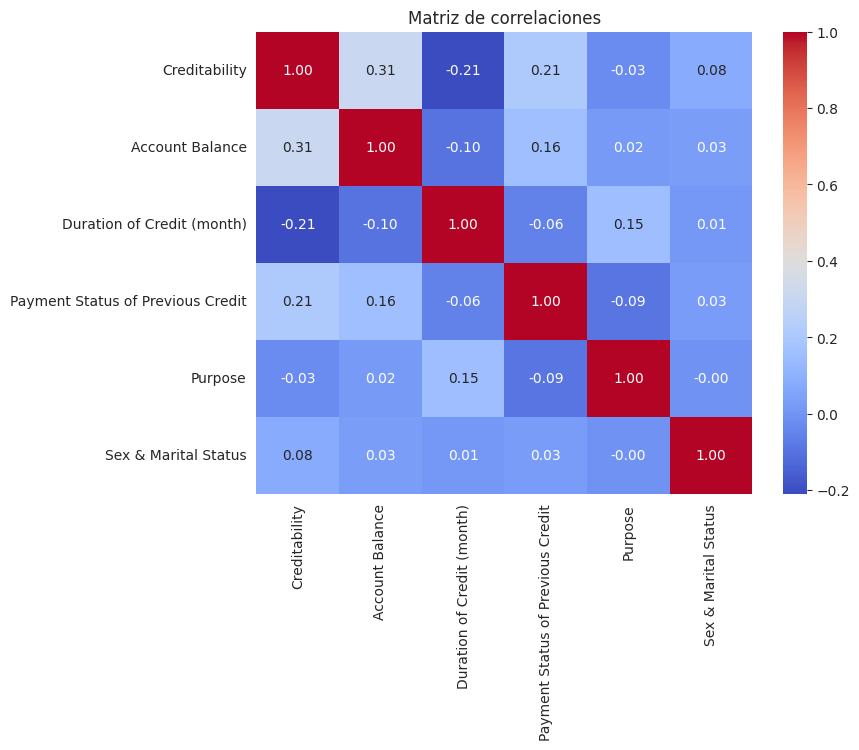

In [55]:
# Se crea la matriz
matriz = prestamos.corr()

# Grafico de la matriz
# tamaño de la figura
plt.figure(figsize=(8,6))

# Crea el mapa de calor
sns.heatmap(matriz,annot=True, cmap='coolwarm',fmt='.2f')

# Agregar Titulo y etiquetas
plt.title('Matriz de correlaciones')
plt.show()

## Cuantificar la variables continuas
1. Duration of credit month


In [56]:
# Estadisticas descriptivas de las variables continuas

estadistica_duration = prestamos['Duration of Credit (month)'].describe()

print(estadistica_duration)

count    756.000000
mean      21.425926
std       12.665166
min        4.000000
25%       12.000000
50%       18.000000
75%       27.000000
max       72.000000
Name: Duration of Credit (month), dtype: float64


In [57]:
import pandas as pd

def cuantificar_variable(dataframe, nombreVar, num_grupos=4):
    # Ordenar el DataFrame según la columna a cuantificar
    dataframe = dataframe.sort_values(by=nombreVar, ascending=True).reset_index(drop=True)
    n = len(dataframe)
    
    # Calcular los límites de los cuartiles
    cuartiles = [dataframe[nombreVar].quantile(i / num_grupos) for i in range(1, num_grupos)]
    
    for i in range(len(dataframe)):
        for j, limite in enumerate(cuartiles):
            if dataframe.at[i, nombreVar] <= limite:
                dataframe.at[i, nombreVar] = j
                break
        else:
            dataframe.at[i, nombreVar] = num_grupos - 1

    return dataframe

prestamos = cuantificar_variable(prestamos, 'Duration of Credit (month)',num_grupos=4)


#### Diagramas de cajas de las variables
+ Creditability
+ Account Balance  
+ Duration of Credit (month)  
+ Payment Status of Previous Credit
+ Purpose 
+ Sex & Marital Status 

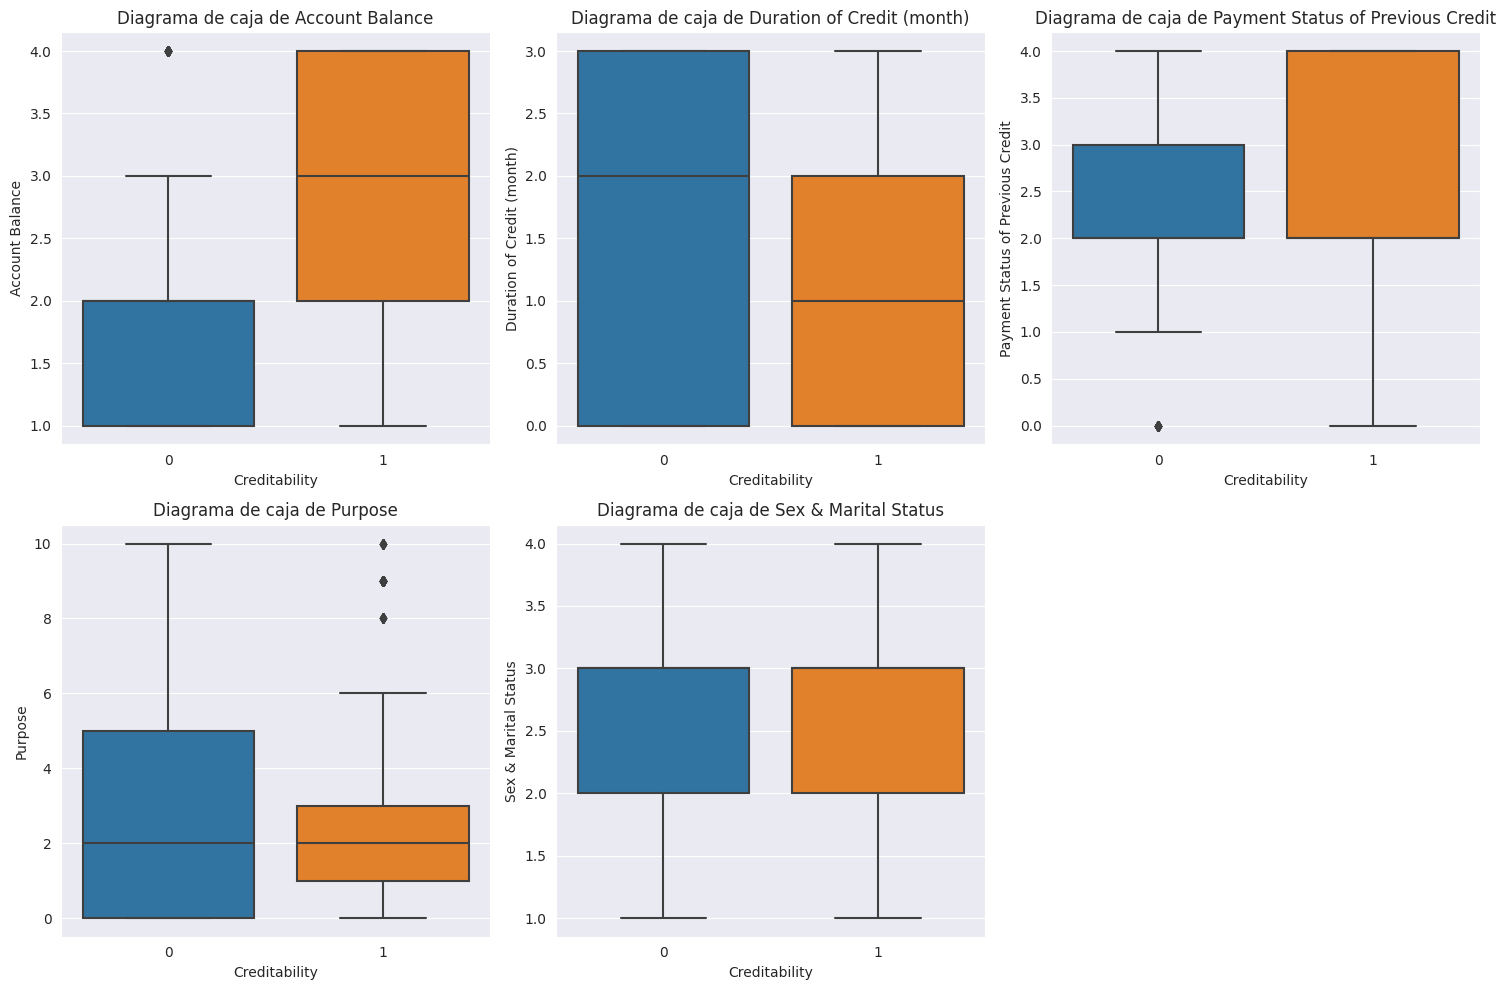

In [58]:
# Creamos la figura
plt.figure(figsize=(15,10))

# Iteramos sobres la categorias elegidas y creamos un diagrama para cada una
for i, variable in enumerate(categorias_elegidas,1):
    plt.subplot(2,3,i) # Crea una cuadricula de 2x3
    sns.boxplot(data=prestamos, y=variable, x='Creditability')
    plt.title(f'Diagrama de caja de {variable}')
# Ajustar los graficos
plt.tight_layout()
plt.show()

## Division de los datos de entrenamientos, prueba y validacion
* Conjunto de entrenamientos = 60%
* Conjunto de validacion = 20%
* Conjunto de test = 20%

In [59]:
# Separa las características (X) y la variable objetivo (y)
X = prestamos[['Account Balance', 'Duration of Credit (month)', 'Payment Status of Previous Credit', 'Purpose', 'Sex & Marital Status']]
y = prestamos['Creditability']


In [63]:
import numpy as np

np.random.seed(42)

# Define las proporciones para la division del los conjuntos
ratios = [0.6,0.2,0.2] # 60% Entrenamiento, 20% validacion, 20% testeo

#Calcular el tamaño de cada conjunto
total_samples = len(X)
sizes = [int(r * total_samples) for r in ratios]

# General indices aleatorios
random_indices = np.random.permutation(total_samples)

#Division de los conjuntos
X_train = X.iloc[random_indices[:sizes[0]]]
X_val = X.iloc[random_indices[sizes[0]: sizes[0] + sizes[1]]]
X_test = X.iloc[random_indices[sizes[0] + sizes[1]:]]

y_train = y.iloc[random_indices[:sizes[0]]]
y_val = y.iloc[random_indices[sizes[0]:sizes[0] + sizes[1]]]
y_test = y.iloc[random_indices[sizes[0] + sizes[1]:]]

print("Cantidad de datos en el conjunto de entrenamiento:", X_train.shape[0])
print("Cantidad de datos en el conjunto de validación:", X_val.shape[0])
print("Cantidad de datos en el conjunto de prueba:", X_test.shape[0])


Cantidad de datos en el conjunto de entrenamiento: 453
Cantidad de datos en el conjunto de validación: 151
Cantidad de datos en el conjunto de prueba: 152


# Creacion del modelo - ___ARBOL DE DECISION___